# Sqoop
- RDB와 Hadoop 간의 import와 export에 Sqoop을 사용
- Hadoop 과 NoSQL, Spark 등은 Elastick Search를 통해 연동

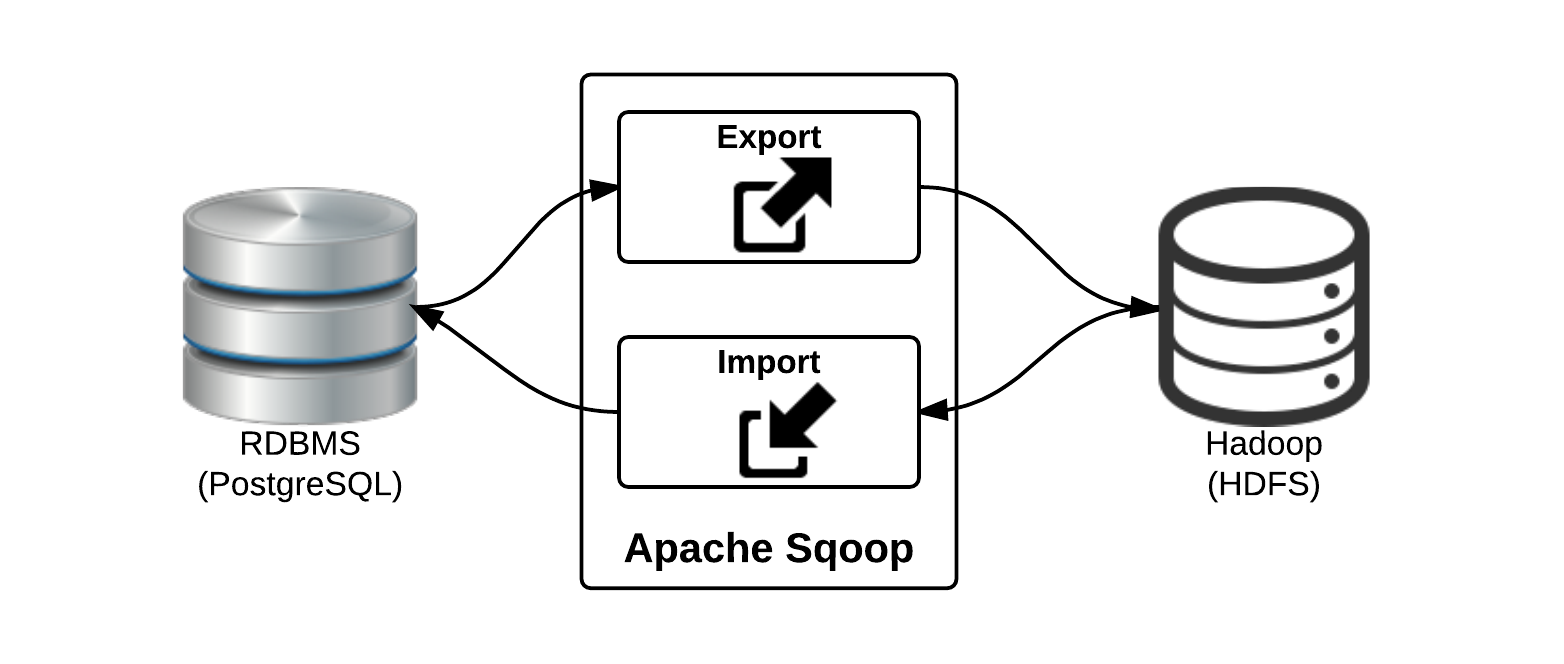

In [3]:
from PIL import Image
img = Image.open('C:/Users/ChangHo Kim/Downloads/Ch05-Fig03.png')
img

### 1. Sqoop 실행

In [ ]:
$sudo sqoop import --connect jdbc:mysql://localhost/test --table salaries --username root --target
-dir/sqoop_out

# Error시 사용 명령어
# $hdfs dfs -mkdir -p /home/hadoop/bigdata/sqoop-1.4.6.bin__hadoop-2.0.4-alpha

# $hdfs dfs -mkdir -p /home/hadoop/bigdata/sqoop-1.4.6.bin__hadoop-2.0.4-alpha/*
#  /home/hadoop/bigdata/sqoop-1.4.6.bin__hadoop-2.0.4-alpha

# sqoop 작동확인
$hadoop fs -ls /sqoop_out

In [ ]:
# MYSQL에 테이블 만들기
USE test;


create table test1 (big1 varchar(1), big2 varchar(2));
create table test2 (big1 varchar(1), big2 varchar(2));
create table test3 (big1 varchar(1), big2 varchar(2));

# 테이블에 값 넣기
insert into test1 (big1, big2) values('A', 'A');
insert into test1 (big1, big2) values('B', 'B');
insert into test1 (big1, big2) values('C', 'C');
insert into test2 (big1, big2) values('D', 'D');
insert into test2 (big1, big2) values('E', 'E');
insert into test2 (big1, big2) values('F', 'F');
insert into test3 (big1, big2) values('G', 'G');
insert into test3 (big1, big2) values('H', 'H');
insert into test3 (big1, big2) values('I', 'I');

# 생성한 테이블 확인
show tables;
select * from test1;
select * from test2;
select * from test3;

# 테이블에 id라는 속성값을 주고 primary key로 지정 후, auto increment
# (sqoop import 시에 primary key가 지정 안되 있으면 import 불가능)
alter table test1 add column 'id' int(10) unsigned primary KEY AUTO_INCREMENT;
alter table test2 add column 'id' int(10) unsigned primary KEY AUTO_INCREMENT;
alter table test3 add column 'id' int(10) unsigned primary KEY AUTO_INCREMENT;

# 테이블 설정 후에 import 시키기
$sudo sqoop import-all-tables --connect jdbc:mysql://localhost/test --username root --exclude-tables
 test3 -warehouse-dir /sqoop_out2

# import 확인
$hadoop fs -ls /sqoop_out2/

# 테이블 내용 확인
$hadoop fs -cat /sqoop_out2/test1/*